In [2]:

import json
import cv2
import requests
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.bda.v20200324 import bda_client
from tencentcloud.bda.v20200324 import models as bda_models

import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [3]:
"""
https://cloud.tencent.com/document/api/1208/42985#BodyJointsResult
"""
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "bda.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = bda_client.BdaClient(cred, "", clientProfile) 

    req = bda_models.DetectBodyJointsRequest()
    img_path="./images/人像分割-无背景图.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
         "Image": str(img, encoding='utf-8'),
#         "Url": ""
    }
    req.from_json_string(json.dumps(params))

    resp = client.DetectBodyJoints(req).to_json_string() 
    resp=json.loads(resp)
    print(resp)

except TencentCloudSDKException as err: 
    print(err) 

{'BodyJointsResults': [{'BoundBox': {'X': 103, 'Y': -5, 'Width': 288, 'Height': 545}, 'BodyJoints': [{'KeyPointType': '头部', 'X': 269.978515625, 'Y': 43.794921875}, {'KeyPointType': '颈部', 'X': 269.978515625, 'Y': 139.361328125}, {'KeyPointType': '右肩', 'X': 197.166015625, 'Y': 148.462890625}, {'KeyPointType': '右肘', 'X': 156.208984375, 'Y': 257.681640625}, {'KeyPointType': '右腕', 'X': 128.904296875, 'Y': 348.697265625}, {'KeyPointType': '左肩', 'X': 333.689453125, 'Y': 180.318359375}, {'KeyPointType': '左肘', 'X': 333.689453125, 'Y': 280.435546875}, {'KeyPointType': '左腕', 'X': 297.283203125, 'Y': 330.494140625}, {'KeyPointType': '右髋', 'X': 210.818359375, 'Y': 344.146484375}, {'KeyPointType': '右膝', 'X': 206.267578125, 'Y': 430.611328125}, {'KeyPointType': '右踝', 'X': 210.818359375, 'Y': 407.857421875}, {'KeyPointType': '左髋', 'X': 265.427734375, 'Y': 344.146484375}, {'KeyPointType': '左膝', 'X': 288.181640625, 'Y': 430.611328125}, {'KeyPointType': '左踝', 'X': 269.978515625, 'Y': 394.205078125}], 'Co

In [8]:
resp["BodyJointsResults"][0]

{'BoundBox': {'X': 103, 'Y': -5, 'Width': 288, 'Height': 545},
 'BodyJoints': [{'KeyPointType': '头部', 'X': 269.978515625, 'Y': 43.794921875},
  {'KeyPointType': '颈部', 'X': 269.978515625, 'Y': 139.361328125},
  {'KeyPointType': '右肩', 'X': 197.166015625, 'Y': 148.462890625},
  {'KeyPointType': '右肘', 'X': 156.208984375, 'Y': 257.681640625},
  {'KeyPointType': '右腕', 'X': 128.904296875, 'Y': 348.697265625},
  {'KeyPointType': '左肩', 'X': 333.689453125, 'Y': 180.318359375},
  {'KeyPointType': '左肘', 'X': 333.689453125, 'Y': 280.435546875},
  {'KeyPointType': '左腕', 'X': 297.283203125, 'Y': 330.494140625},
  {'KeyPointType': '右髋', 'X': 210.818359375, 'Y': 344.146484375},
  {'KeyPointType': '右膝', 'X': 206.267578125, 'Y': 430.611328125},
  {'KeyPointType': '右踝', 'X': 210.818359375, 'Y': 407.857421875},
  {'KeyPointType': '左髋', 'X': 265.427734375, 'Y': 344.146484375},
  {'KeyPointType': '左膝', 'X': 288.181640625, 'Y': 430.611328125},
  {'KeyPointType': '左踝', 'X': 269.978515625, 'Y': 394.205078125}],

In [32]:
BoundBox=resp["BodyJointsResults"][0]['BodyJoints']
head=BoundBox[0]
X=head['X']
Y=head['Y']
center=(int(X),int(Y))

In [33]:
img=plt.imread(img_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


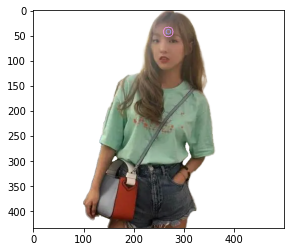

In [39]:
cv2.circle(img, center, 10, (255, 0, 255))
plt.imshow(img)